In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.initializers import Zeros

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train_binary = (y_train == 5).astype(int)
y_test_binary = (y_test == 5).astype(int)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1, kernel_initializer=Zeros(), bias_initializer=Zeros())
])
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

print('Test:')
test_loss, test_accuracy = model.evaluate(x_test, y_test_binary)

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Test:
313/313 [==============================] - 2s 3ms/step - loss: 1.3759 - accuracy: 0.9108


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train_binary = (y_train == 5).astype(int)
y_test_binary = (y_test == 5).astype(int)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1) #activation='linear'
])

print(model.summary())

model.compile(loss='binary_crossentropy', metrics=['accuracy'])
#test_loss, test_accuracy = model.evaluate(x_test, y_test_binary)
model.fit(x_train, y_train_binary, epochs=4, batch_size=2048, validation_split=0.98)

print('Test:')
test_loss, test_accuracy = model.evaluate(x_test, y_test_binary)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/4
1/1 [==============================] - 2s 2s/step - loss: 3.1019 - accuracy: 0.7975 - val_loss: 2.3031 - val_accuracy: 0.8495
Epoch 2/4
1/1 [==============================] - 0s 362ms/step - loss: 2.2141 - accuracy: 0.8550 - val_loss: 1.7572 - val_accuracy: 0.8852
Epoch 3/4
1/1 [==============================] - 0s 368ms/step - loss: 1.5528 - accuracy: 0.8992 - val_loss: 1.6476 - val_accuracy: 0.8928
E

313/313 [==============================] - 2s 4ms/step


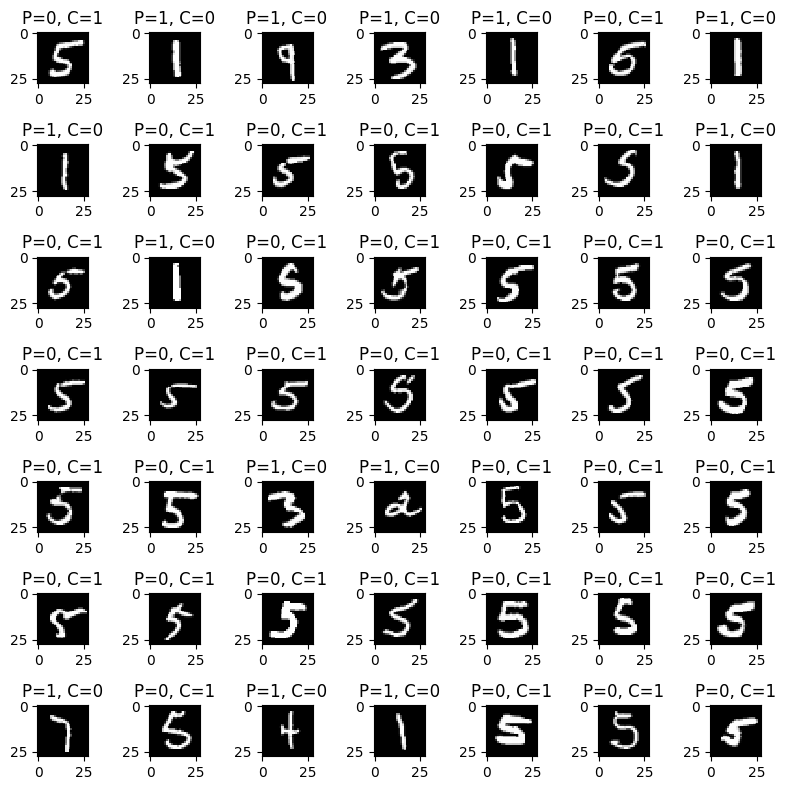

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = (model.predict(x_test) >= 0.5).astype(int)[:,0]
incorrect_indices = np.nonzero(y_pred != y_test_binary)[0]
plt.figure(figsize=(8,8))
for i, incorrect in enumerate(np.random.choice(incorrect_indices, 49, False)): #incorrect_indices[:49]):
    plt.subplot(7,7,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("P={}, C={}".format(y_pred[incorrect], y_test_binary[incorrect]))
    plt.tick_params(axis='both',which='both',bottom='off',left='off',labelbottom='off',labelleft='off')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score,f1_score

y_pred = (model.predict(x_test) >= 0.5).astype(int)[:,0]

conf_matrix = confusion_matrix(y_test_binary, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

precision = precision_score(y_test_binary, y_pred)
print("Precision:", precision)

recall = recall_score(y_test_binary, y_pred)
print("Recall:", recall)

f1_s = f1_score(y_test_binary, y_pred)
print("F1-score:", f1_s)

print('Para la clase 0:')
precision = precision_score(y_test_binary, y_pred, pos_label=0)
print("Precision:", precision)

recall = recall_score(y_test_binary, y_pred, pos_label=0)
print("Recall:", recall)

f1_s = f1_score(y_test_binary, y_pred, pos_label=0)
print("F1-score:", f1_s)

313/313 [==============================] - 0s 1ms/step
Matriz de confusión:
[[8919  189]
 [ 875   17]]
Precision: 0.0825242718446602
Recall: 0.01905829596412556
F1-score: 0.030965391621129323
Para la clase 0:
Precision: 0.9106595875025526
Recall: 0.9792490118577075
F1-score: 0.9437096603534018
